In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import sklearn

In [8]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   -- ------------------------------------- 3.9/72.0 MB 29.4 MB/s eta 0:00:03
   ----- ---------------------------------- 10.2/72.0 MB 29.0 MB/s eta 0:00:03
   --------- ------------------------------ 17.6/72.0 MB 30.8 MB/s eta 0:00:02
   ------------ --------------------------- 22.5/72.0 MB 29.1 MB/s eta 0:00:02
   -------------- ------------------------- 26.5/72.0 MB 27.1 MB/s eta 0:00:02
   ------------------ --------------------- 33.3/72.0 MB 27.8 MB/s eta 0:00:02
   ---------------------- ----------------- 39.8/72.0 MB 28.5 MB/s eta 0:00:02
   ------------------------- -------------- 45.4/72.0 MB 28.3 MB/s eta 0:00:01
   -------------------------- ------------- 46.9/72.0 MB 27.7 MB/s eta 0:00:01
   ---------------------------- ----------- 52.2/72.0 MB 25.8 MB/s eta 0:00:01
   --------------------------------- ------ 60.0/72.0 MB 26.8 MB/s eta 0:00:01
   ------------------------------------ --- 66.1/72.0 MB 26.8 


[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("churn_dataset.csv")
dataset.dropna(inplace=True)

X = dataset.drop(
    columns=[
        "Churn_binary",
        # "customerID",
        "final_refund_amount",
    ]
)
y = dataset["Churn_binary"]

X = pd.get_dummies(X, drop_first=True)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# model = XGBClassifier()
# model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(xtrain, ytrain)

predictions = model.predict(xtest)
accuracy = model.score(xtest, ytest)
print(f"Accuracy: {accuracy}")

d:\programming\python files\ml\ml-dl_bootcamp\firstAssignment\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1780: FutureWarning: The default value for l1_ratios will change from None to (0.0,) in version 1.10. From version 1.10 onwards, only array-like with values in [0, 1] will be allowed, None will be forbidden. To avoid this warning, explicitly set a value, e.g. l1_ratios=(0,).
  warnings.warn(
d:\programming\python files\ml\ml-dl_bootcamp\firstAssignment\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1823: FutureWarning: The fitted attributes of LogisticRegressionCV will be simplified in scikit-learn 1.10 to remove redundancy. Set`use_legacy_attributes=False` to enable the new behavior now, or set it to `True` to silence this warning during the transition period while keeping the deprecated behavior for the time being. The default value of use_legacy_attributes will change from True to False in scikit-learn 1.10. See the docstring of LogisticRegressionCV for mo

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

dataset = pd.read_csv("churn_dataset.csv")
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"], errors="coerce")
dataset.dropna(inplace=True)

X = dataset.drop(
    columns=[
        column
        for column in dataset.columns
        if column
        not in [
            "final_refund_amount",
        ]
    ]
)
y = dataset["Churn_binary"]

X = pd.get_dummies(X, drop_first=True)

# without scaling, 'TotalCharges' (thousands) will overwhelm 'tenure' (tens).
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

xtrain, xtest, ytrain, ytest = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)
model.fit(xtrain, ytrain)

accuracy = model.score(xtest, ytest)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(classification_report(ytest, model.predict(xtest)))

Logistic Regression Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       969
           1       1.00      1.00      1.00       325

    accuracy                           1.00      1294
   macro avg       1.00      1.00      1.00      1294
weighted avg       1.00      1.00      1.00      1294



d:\programming\python files\ml\ml-dl_bootcamp\firstAssignment\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1780: FutureWarning: The default value for l1_ratios will change from None to (0.0,) in version 1.10. From version 1.10 onwards, only array-like with values in [0, 1] will be allowed, None will be forbidden. To avoid this warning, explicitly set a value, e.g. l1_ratios=(0,).
  warnings.warn(
d:\programming\python files\ml\ml-dl_bootcamp\firstAssignment\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1823: FutureWarning: The fitted attributes of LogisticRegressionCV will be simplified in scikit-learn 1.10 to remove redundancy. Set`use_legacy_attributes=False` to enable the new behavior now, or set it to `True` to silence this warning during the transition period while keeping the deprecated behavior for the time being. The default value of use_legacy_attributes will change from True to False in scikit-learn 1.10. See the docstring of LogisticRegressionCV for mo

Accuracy: 0.7403


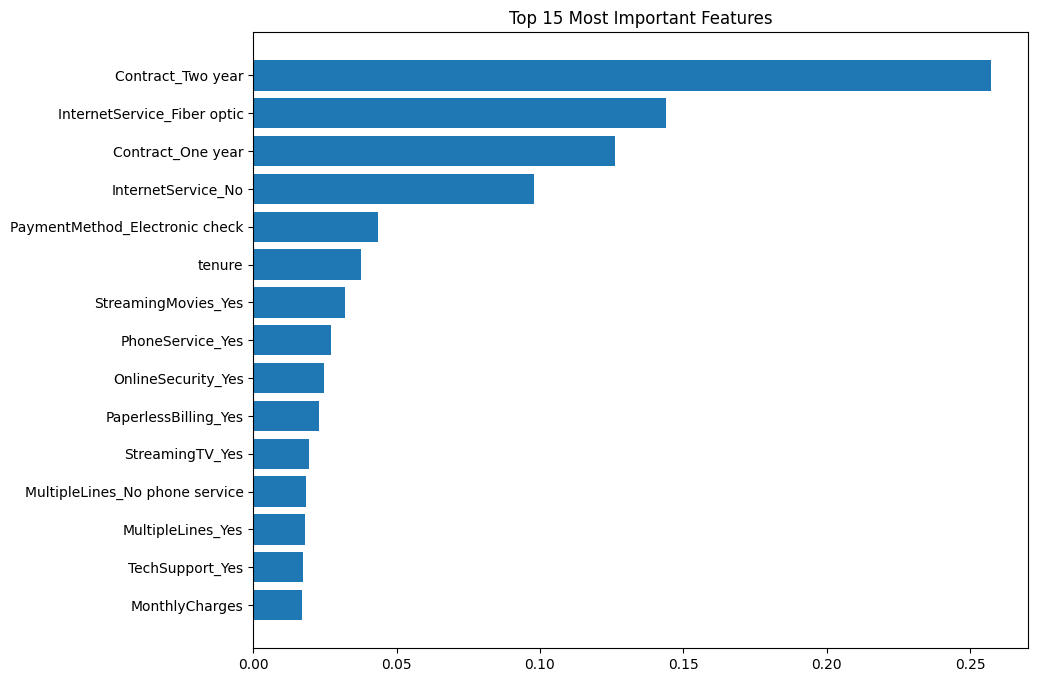

Accuracy: 0.7697063369397218


In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("churn_dataset.csv")
dataset.dropna(inplace=True)

drop_columns = [
    "Churn_binary",
    "customerID",
    # "final_refund_amount",
    "TotalCharges",
    # "OnlineSecurity",
    "TechSupport",
    "OnlineBackup",
    "DeviceProtection",
    "StreamingTV",
]

X = dataset.drop(columns=drop_columns)
y = dataset["Churn_binary"]
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("churn_dataset.csv")
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"], errors="coerce")
dataset.dropna(inplace=True)
redundant_cols = [
    "OnlineSecurity_No internet service",
    "OnlineBackup_No internet service",
    "DeviceProtection_No internet service",
    "TechSupport_No internet service",
    "StreamingTV_No internet service",
    "StreamingMovies_No internet service",
]

X = dataset.drop(
    columns=["Churn_binary", "customerID", "final_refund_amount", "TotalCharges"]
)
y = dataset["Churn_binary"]

X = pd.get_dummies(X, drop_first=True)

X = X.drop(columns=[c for c in redundant_cols if c in X.columns])
scale_weight = y.value_counts()[0] / y.value_counts()[1]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.02,  # Lower learning rate with more estimators prevents overfitting
    max_depth=4,  # Shallower trees reduce noise pickup from categorical data
    scale_pos_weight=scale_weight,
    subsample=0.8,  # Use 80% of data per tree to improve generalization
    colsample_bytree=0.8,  # Use 80% of features per tree
    random_state=42,
)

model.fit(xtrain, ytrain)

accuracy = model.score(xtest, ytest)
print(f"Accuracy: {accuracy:.4f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sorted_idx = model.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx][-15:], model.feature_importances_[sorted_idx][-15:])
plt.title("Top 15 Most Important Features")
plt.show()
X = pd.get_dummies(X, drop_first=True)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(xtrain, ytrain)

predictions = model.predict(xtest)
accuracy = model.score(xtest, ytest)
print(f"Accuracy: {accuracy}")

In [35]:
from sklearn.metrics import classification_report, f1_score

# 1. Feature Engineering: Create a 'Charge Density' feature
# This helps the model see if a customer is paying 'too much' for their tenure
X["Avg_Monthly_Spent"] = X["MonthlyCharges"] / (X["tenure"] + 1)

# 2. Simplify the model to prevent over-adjusting
# We lower scale_pos_weight slightly to balance accuracy and recall
negative_cases = ytrain.value_counts()[0]
positive_cases = ytrain.value_counts()[1]
balanced_weight = np.sqrt(
    negative_cases / positive_cases
)  # Square root is a 'milder' weight

model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,  # Very shallow trees to focus on big patterns
    scale_pos_weight=balanced_weight,
    gamma=1,  # Minimum loss reduction to make a split (prevents overfit)
    random_state=42,
)

model.fit(xtrain, ytrain)

# 3. Evaluate with more than just Accuracy
y_pred = model.predict(xtest)
print(f"Accuracy: {model.score(xtest, ytest):.4f}")
print("\n--- Why 74% might be better than 76% ---")
print(classification_report(ytest, y_pred))

Accuracy: 0.7790

--- Why 74% might be better than 76% ---
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       969
           1       0.55      0.65      0.60       325

    accuracy                           0.78      1294
   macro avg       0.71      0.74      0.72      1294
weighted avg       0.79      0.78      0.78      1294



In [29]:
!pip install --quiet seaborn


[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import seaborn as sns

plot_data = xtrain.copy()
plot_data["Target_Churn"] = ytrain

corr = plot_data.corr()

threshold = 0.1
sig_corr = corr.copy()
sig_corr[np.abs(sig_corr) < threshold] = np.nan

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 10))

sns.heatmap(
    sig_corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
)

plt.title(f"Significant Correlations (|r| > {threshold})", fontsize=16)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [25]:
dataset.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,final_refund_amount,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_binary
0,7590-VHVEG,Female,0,Yes,No,1.0,0.000000,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34.0,0.000000,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2.0,3713.570921,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45.0,0.000000,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2.0,948.889474,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8.0,948.773698,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,1452-KIOVK,Male,0,No,Yes,22.0,0.000000,Yes,Yes,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,No,No,10.0,0.000000,No,No phone service,DSL,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,7892-POOKP,Female,0,Yes,No,28.0,3085.352056,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62.0,0.000000,Yes,No,DSL,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [51]:
results = model.predict(xtest)
score = model.score(xtest, ytest)

print(results[:])
print("Accuracy:", score)

[1 0 0 ... 0 1 0]
Accuracy: 1.0
